In [101]:
import pandas as pd

# Python standard library imports
import time

# Third-party imports for database connection and data manipulation
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report

In [102]:
# Database connection parameters
dbname = 'train'
user = 'narmina'
password = 'narmina7877'
host = 'localhost'  # localhost or the server address
port = '5433'  # default PostgreSQL port is 5432

# Establish a connection to the database
connection_str = f"postgresql://{user}:{password}@{host}:{port}/{dbname}"
engine = create_engine(connection_str)

In [104]:
# Define the query with placeholders for parameters
query = f"""
SELECT * FROM vehicle_data where mapped_veh_id=181;
"""

# Start timing
start_time = time.time()

# Execute the query and fetch the data into a DataFrame
df = pd.read_sql_query(query, engine)

# End timing
end_time = time.time()
print(f"Query took {end_time - start_time} seconds to run.")
# Close the database connection
engine.dispose()

Query took 6.0535643100738525 seconds to run.


In [105]:
# Inspect the structure of the data (displaying first few rows)
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
   mapped_veh_id      timestamps_utc        lat       lon  rs_e_inairtemp_pc1  \
0            181 2023-06-08 10:51:16  50.956617  3.628814                52.0   
1            181 2023-06-08 13:35:20  50.851086  3.601138                53.0   
2            181 2023-06-08 13:46:23  50.742865  3.604239                54.0   
3            181 2023-06-08 15:44:23  51.130192  3.660497                56.0   
4            181 2023-06-08 17:47:30  51.015893  3.774760                71.0   

   rs_e_inairtemp_pc2  rs_e_oilpress_pc1  rs_e_oilpress_pc2  rs_e_rpm_pc1  \
0                47.0              396.0              320.0        1498.0   
1                38.0              248.0              324.0         907.0   
2                45.0              200.0              196.0         801.0   
3                51.0              362.0              313.0        1769.0   
4                68.0                0.0               20.0           0.0   

   rs_e_rpm_pc2  

In [106]:
# Display column names
print("\nColumn names:")
print(df.columns)


Column names:
Index(['mapped_veh_id', 'timestamps_utc', 'lat', 'lon', 'rs_e_inairtemp_pc1',
       'rs_e_inairtemp_pc2', 'rs_e_oilpress_pc1', 'rs_e_oilpress_pc2',
       'rs_e_rpm_pc1', 'rs_e_rpm_pc2', 'rs_e_wattemp_pc1', 'rs_e_wattemp_pc2',
       'rs_t_oiltemp_pc1', 'rs_t_oiltemp_pc2'],
      dtype='object')


In [107]:
# Basic statistics summary
print("\nBasic statistics:")
print(df.describe())


Basic statistics:
       mapped_veh_id                 timestamps_utc            lat  \
count       265494.0                         265494  265494.000000   
mean           181.0  2023-05-17 20:16:38.148101376      50.957637   
min            181.0            2023-01-23 08:28:54      50.697195   
25%            181.0  2023-03-10 19:56:23.750000128      50.851948   
50%            181.0     2023-05-22 16:11:18.500000      51.006680   
75%            181.0  2023-07-18 20:03:47.750000128      51.035863   
max            181.0            2023-09-13 21:39:10      51.246158   
std              0.0                            NaN       0.128082   

                 lon  rs_e_inairtemp_pc1  rs_e_inairtemp_pc2  \
count  265494.000000       265494.000000       265317.000000   
mean        3.816460           35.174235           27.907745   
min         3.575034            0.000000            0.000000   
25%         3.645639           27.000000           17.000000   
50%         3.756488          

In [108]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
mapped_veh_id           0
timestamps_utc          0
lat                     0
lon                     0
rs_e_inairtemp_pc1      0
rs_e_inairtemp_pc2    177
rs_e_oilpress_pc1       0
rs_e_oilpress_pc2     177
rs_e_rpm_pc1            0
rs_e_rpm_pc2          177
rs_e_wattemp_pc1        0
rs_e_wattemp_pc2      177
rs_t_oiltemp_pc1        0
rs_t_oiltemp_pc2      177
dtype: int64


In [109]:
# Check for duplicates
duplicate_rows = df[df.duplicated()]
print("\nNumber of duplicate rows:", len(duplicate_rows))


Number of duplicate rows: 0


In [110]:
# Assuming df is the DataFrame containing the data

# Counting rows where air temperature exceeds 65°C
air_temp_exceed_65 = df[df['rs_e_inairtemp_pc1'] > 65]  # Checking for PC1, adjust column names if needed
air_temp_exceed_65_count = len(air_temp_exceed_65)
print("Number of rows with air temperature exceeding 65°C:", air_temp_exceed_65_count)

# Counting rows where water temperature exceeds 100°C
water_temp_exceed_100 = df[df['rs_e_wattemp_pc1'] > 100]  # Checking for PC1, adjust column names if needed
water_temp_exceed_100_count = len(water_temp_exceed_100)
print("Number of rows with water temperature exceeding 100°C:", water_temp_exceed_100_count)

# Counting rows where oil temperature exceeds 115°C
oil_temp_exceed_115 = df[df['rs_t_oiltemp_pc1'] > 115]  # Checking for PC1, adjust column names if needed
oil_temp_exceed_115_count = len(oil_temp_exceed_115)
print("Number of rows with oil temperature exceeding 115°C:", oil_temp_exceed_115_count)


Number of rows with air temperature exceeding 65°C: 1806
Number of rows with water temperature exceeding 100°C: 0
Number of rows with oil temperature exceeding 115°C: 0


In [111]:
# Assuming df is the DataFrame containing the data

# Counting rows where air temperature exceeds 65°C
air_temp_exceed_65 = df[df['rs_e_inairtemp_pc2'] > 65]  # Checking for PC1, adjust column names if needed
air_temp_exceed_65_count = len(air_temp_exceed_65)
print("Number of rows with air temperature exceeding 65°C:", air_temp_exceed_65_count)

# Counting rows where water temperature exceeds 100°C
water_temp_exceed_100 = df[df['rs_e_wattemp_pc2'] > 100]  # Checking for PC1, adjust column names if needed
water_temp_exceed_100_count = len(water_temp_exceed_100)
print("Number of rows with water temperature exceeding 100°C:", water_temp_exceed_100_count)

# Counting rows where oil temperature exceeds 115°C
oil_temp_exceed_115 = df[df['rs_t_oiltemp_pc2'] > 115]  # Checking for PC1, adjust column names if needed
oil_temp_exceed_115_count = len(oil_temp_exceed_115)
print("Number of rows with oil temperature exceeding 115°C:", oil_temp_exceed_115_count)

Number of rows with air temperature exceeding 65°C: 929
Number of rows with water temperature exceeding 100°C: 0
Number of rows with oil temperature exceeding 115°C: 0


In [112]:
# Time Series Uniformity
# Ensure uniform sampling time across the dataset (Assuming 'timestamps_utc' column is in datetime format)
df['timestamps_utc'] = pd.to_datetime(df['timestamps_utc'])

In [113]:
# Feature Engineering
df['air_temp_difference'] = df['rs_e_inairtemp_pc1'] - df['rs_e_inairtemp_pc2']
df['water_temp_difference'] = df['rs_e_wattemp_pc1'] - df['rs_e_wattemp_pc2']
df['oil_temp_difference'] = df['rs_t_oiltemp_pc1'] - df['rs_t_oiltemp_pc2']
print(df['air_temp_difference'])
print(df['water_temp_difference'])
print(df['oil_temp_difference'])

0          5.0
1         15.0
2          9.0
3          5.0
4          3.0
          ... 
265489    15.0
265490    -3.0
265491    13.0
265492     2.0
265493     6.0
Name: air_temp_difference, Length: 265494, dtype: float64
0        -1.0
1        -1.0
2         2.0
3         0.0
4        -3.0
         ... 
265489   -6.0
265490    1.0
265491    5.0
265492    0.0
265493   -5.0
Name: water_temp_difference, Length: 265494, dtype: float64
0        -2.0
1        -3.0
2        -4.0
3        -3.0
4        -7.0
         ... 
265489   -8.0
265490   -1.0
265491    0.0
265492   -3.0
265493   -7.0
Name: oil_temp_difference, Length: 265494, dtype: float64


Shapiro-Wilk test for 'rs_e_inairtemp_pc1': p-value = 0.0000


/Users/narmina/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


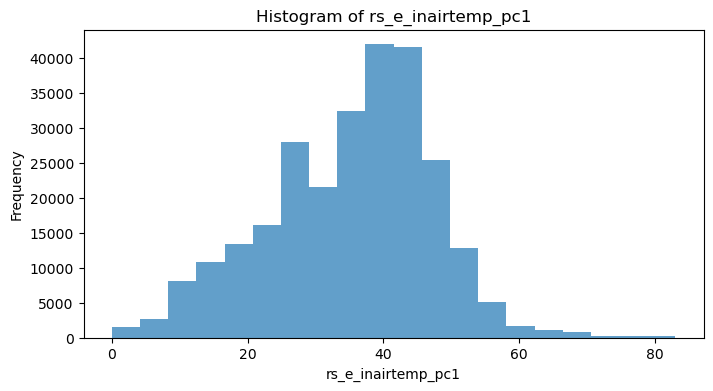

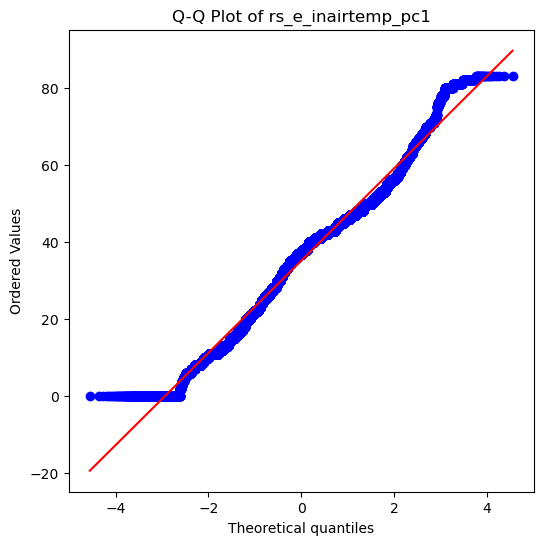

Shapiro-Wilk test for 'rs_e_inairtemp_pc2': p-value = 1.0000


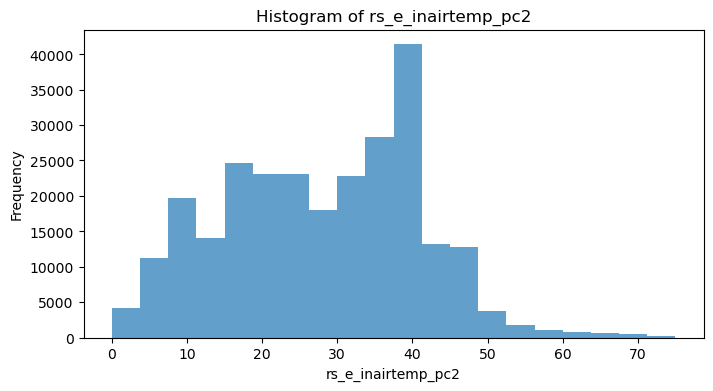

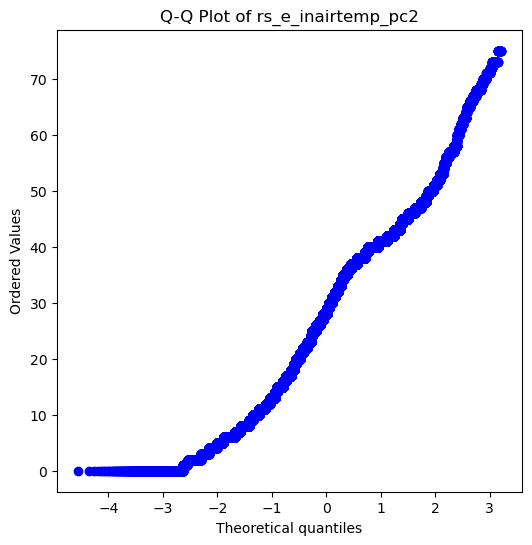

Shapiro-Wilk test for 'rs_e_wattemp_pc1': p-value = 0.0000


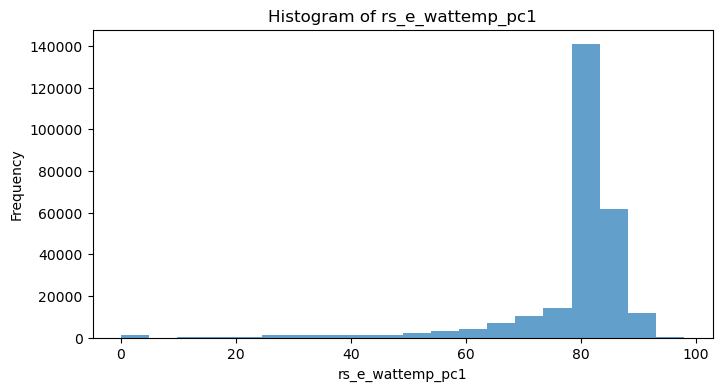

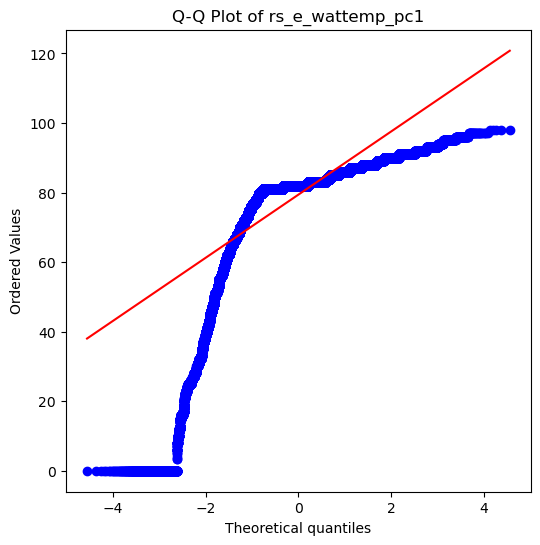

Shapiro-Wilk test for 'rs_e_wattemp_pc2': p-value = 1.0000


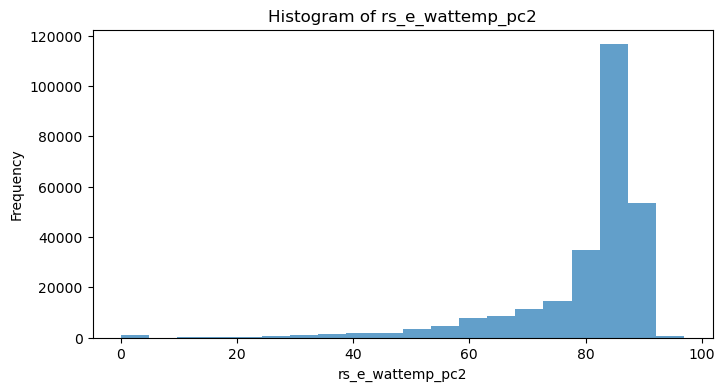

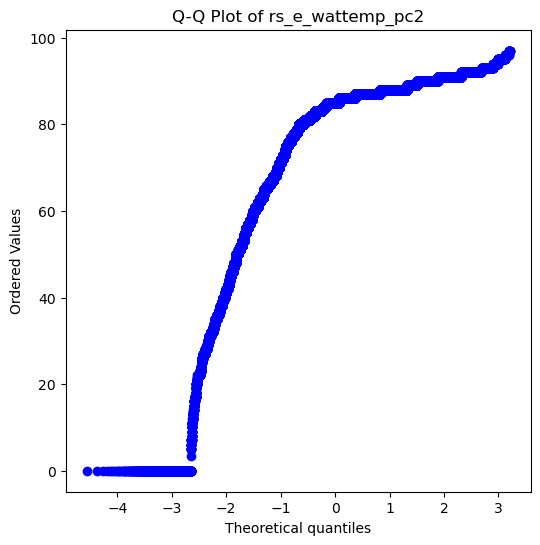

Shapiro-Wilk test for 'rs_t_oiltemp_pc1': p-value = 0.0000


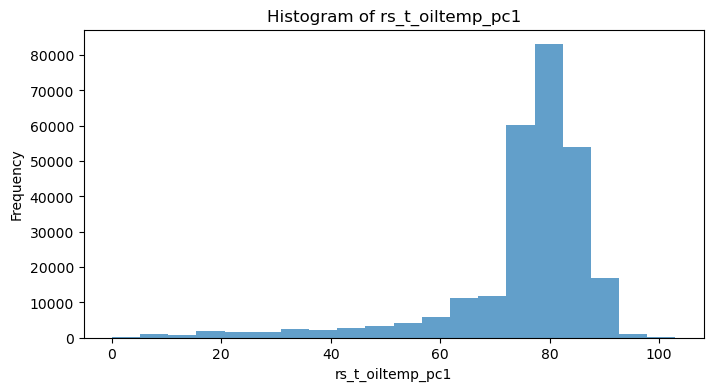

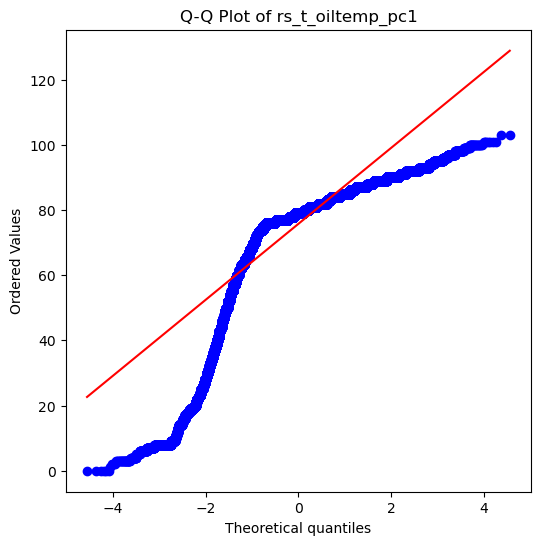

Shapiro-Wilk test for 'rs_t_oiltemp_pc2': p-value = 1.0000


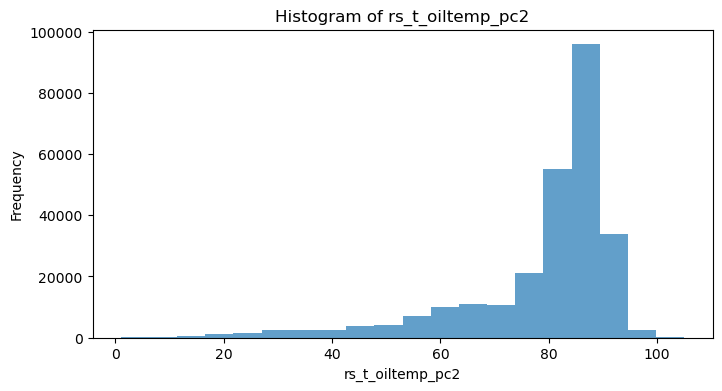

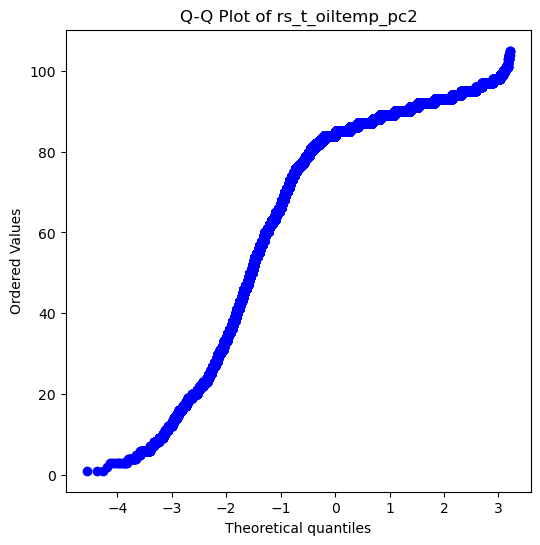

In [114]:
# List of columns to check for Gaussian distribution
columns_to_check = ['rs_e_inairtemp_pc1', 'rs_e_inairtemp_pc2', 'rs_e_wattemp_pc1', 'rs_e_wattemp_pc2', 'rs_t_oiltemp_pc1', 'rs_t_oiltemp_pc2']

for column in columns_to_check:
    # Shapiro-Wilk test for normality
    stat, p = stats.shapiro(df[column])
    print(f"Shapiro-Wilk test for '{column}': p-value = {p:.4f}")
    
    # Histogram to visualize the distribution
    plt.figure(figsize=(8, 4))
    plt.hist(df[column], bins=20, alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()
    
    # Q-Q plot to assess normality visually
    plt.figure(figsize=(6, 6))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()

In [115]:
from scipy.stats import zscore

threshold = 3  # Set your threshold here
columns_to_check = ['rs_e_inairtemp_pc1', 'rs_e_inairtemp_pc2', 'rs_e_wattemp_pc1', 'rs_e_wattemp_pc2', 'rs_t_oiltemp_pc1', 'rs_t_oiltemp_pc2']

for column in columns_to_check:
    z_scores = zscore(df[column])
    anomalies = df[abs(z_scores) > threshold]
    print(f"Number of anomalies detected using Z-Score method in '{column}': {len(anomalies)}")


Number of anomalies detected using Z-Score method in 'rs_e_inairtemp_pc1': 566
Number of anomalies detected using Z-Score method in 'rs_e_inairtemp_pc2': 0
Number of anomalies detected using Z-Score method in 'rs_e_wattemp_pc1': 7576
Number of anomalies detected using Z-Score method in 'rs_e_wattemp_pc2': 0
Number of anomalies detected using Z-Score method in 'rs_t_oiltemp_pc1': 8305
Number of anomalies detected using Z-Score method in 'rs_t_oiltemp_pc2': 0


In [116]:
import numpy as np

def entropy(series):
    # Get value counts for the column
    value_counts = series.value_counts(normalize=True)
    # Calculate entropy
    entropy = -np.sum(value_counts * np.log2(value_counts))
    return entropy

# Columns to calculate entropy for
columns_to_check = ['rs_e_inairtemp_pc1', 'rs_e_inairtemp_pc2', 'rs_e_wattemp_pc1', 'rs_e_wattemp_pc2', 'rs_t_oiltemp_pc1', 'rs_t_oiltemp_pc2']

# Calculate entropy for each column
for column in columns_to_check:
    column_entropy = entropy(df[column])
    print(f"Entropy of '{column}': {column_entropy:.4f}")


Entropy of 'rs_e_inairtemp_pc1': 5.6298
Entropy of 'rs_e_inairtemp_pc2': 5.7235
Entropy of 'rs_e_wattemp_pc1': 4.3598
Entropy of 'rs_e_wattemp_pc2': 4.7673
Entropy of 'rs_t_oiltemp_pc1': 5.3388
Entropy of 'rs_t_oiltemp_pc2': 5.4604


In [117]:
# Sort DataFrame by timestamps_utc
df = df.sort_values(by='timestamps_utc')

In [118]:
# Calculate time differences between consecutive timestamps to find GPS sampling rate
df['time_diff'] = df['timestamps_utc'].diff().dt.total_seconds()
gps_sampling_rate_max = df['time_diff'].max()
gps_sampling_rate_min = df['time_diff'].min()
gps_sampling_rate_mean = df['time_diff'].mean()

# Calculate segment speed using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    distance = R * c  # Distance in kilometers
    return distance

# Calculate segment distance using haversine formula and shift
df['lat_shifted'] = df['lat'].shift()
df['lon_shifted'] = df['lon'].shift()
df['segment_distance'] = df.apply(lambda x: haversine(x['lat'], x['lon'], x['lat_shifted'], x['lon_shifted']), axis=1)
df['segment_time'] = df['time_diff'].shift()

# Ensure to handle NaN values if they exist after shifting

df['segment_speed'] = df['segment_distance'] / df['segment_time']  # Segment speed in km/s

segment_speed_max = df['segment_speed'].max()
segment_speed_min = df['segment_speed'].min()
segment_speed_mean = df['segment_speed'].mean()

# Calculate bounding box
bounding_box = {
    'min_lat': df['lat'].min(),
    'max_lat': df['lat'].max(),
    'min_lon': df['lon'].min(),
    'max_lon': df['lon'].max()
}

print("GPS Sampling Rate (Max, Min, Mean):", gps_sampling_rate_max, gps_sampling_rate_min, gps_sampling_rate_mean)
print("Segment Speed (Max, Min, Mean):", segment_speed_max, segment_speed_min, segment_speed_mean)
print("Bounding Box:", bounding_box)

GPS Sampling Rate (Max, Min, Mean): 423882.0 1.0 76.00432403114206
Segment Speed (Max, Min, Mean): 35.735880843855135 0.0 0.0517708724226589
Bounding Box: {'min_lat': 50.6971951, 'max_lat': 51.246158, 'min_lon': 3.575034, 'max_lon': 5.5419457}


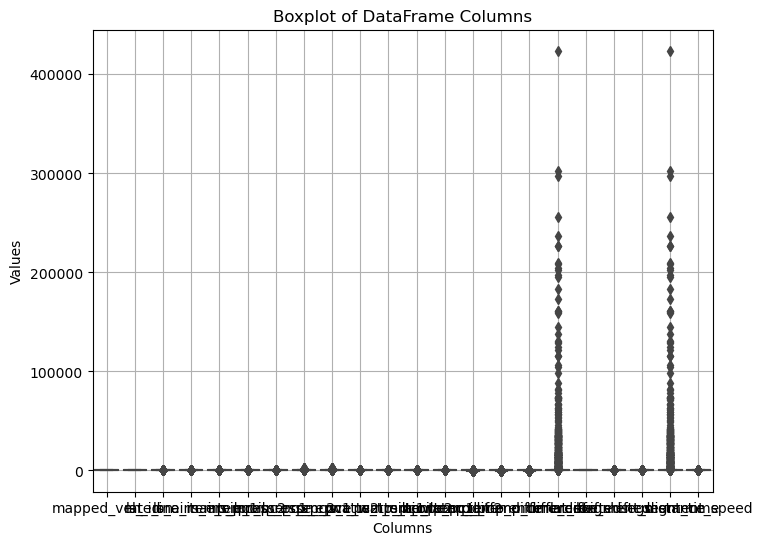

In [123]:
import seaborn as sns

# Drawing a boxplot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)
plt.title('Boxplot of DataFrame Columns')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.grid(True)
plt.show()